반듯한(?) 형태를 얻기 위한 contour 근사

In [1]:
import cv2
import cv2_plus

In [2]:
imgfile = 'images/contour2.png'
img = cv2.imread(imgfile)

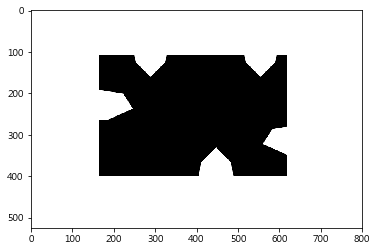

In [3]:
cv2_plus.imshow(img, img_type=0)

In [4]:
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
edge = cv2.Canny(imgray, 100, 200)

In [6]:
edge, contours, hierarchy = cv2.findContours(edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours의 class는 list 하지만 dtype을 봤을 때 contours 자체는 'O'(object)였다.

In [7]:
print(type(contours))

<class 'list'>


In [8]:
import numpy as np
contours_copy= np.array(contours)
print(contours_copy.shape)

(2,)


In [9]:
contours_copy.dtype

dtype('O')

In [10]:
contours_copy.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [11]:
print(contours_copy.shape)
print(contours_copy[0].shape)
print(contours_copy[1].shape)

(2,)
(278, 1, 2)
(286, 1, 2)


**contours[i][:]와 같이 접근**

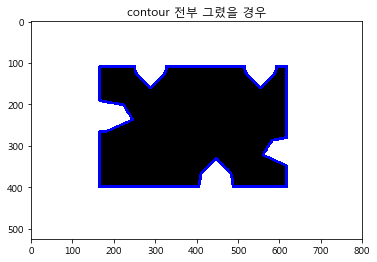

In [12]:
cv2.drawContours(img, contours , -1, (255, 0 , 0), 5)
cv2_plus.imshow(img, title = 'contour 전부 그렸을 경우')

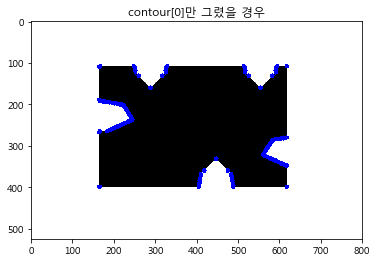

In [13]:
img = cv2.imread(imgfile)
cv2.drawContours(img, contours[0], -1, (255, 0 , 0), 10)
cv2_plus.imshow(img, title = 'contour[0]만 그렸을 경우')

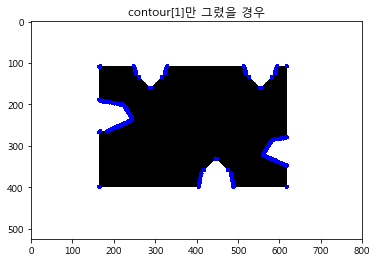

In [14]:
img = cv2.imread(imgfile)
cv2.drawContours(img, contours[1], -1, (255, 0 , 0), 10)
cv2_plus.imshow(img, title = 'contour[1]만 그렸을 경우')

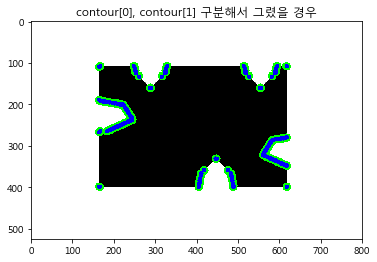

In [15]:
img = cv2.imread(imgfile)
cv2.drawContours(img, contours[0], -1, (0, 255, 0), 20)
cv2.drawContours(img, contours[1], -1, (255, 0 , 0), 10)
cv2_plus.imshow(img, title = 'contour[0], contour[1] 구분해서 그렸을 경우')

**Contour Area** : 폐곡선 형태로 contour에 둘러싸인 부분의 면적<br>
**Contour Perimeter** : Contour 호의 길이<br>

**cv2.contourArea(cnt, bool)**
- cnt : contour
- bool : True(폐곡선) or False(개곡선)

Contour의 둘레 길이를 return

In [16]:
epsilon = 0.1 * cv2.arcLength(contours[0], True)# 둘레 길이의 10%만 활용

epsilon 은 근사정확도로 사용한다.

### Contour Approximation
contours line은 각각의 contours point를 가지며, 이 point를 연결하여 line을 그리는데 이 point 수를 줄여 근사를 수행해 line을 그리는 방법

cv2.approxPolyDP(cnt, epsilon, closed[, approxCurve]) → approxCurve
- cnt : contours point array
- epsilon : 근사 정확도 값. 이 값은 오리지널 커브와 근사 커브간 거리의 최대값으로 사용한다.<br>
최대거리가 클수록 더 먼 곳의 Point까지 고려하기 때문에 Point 수가 줄어든다고함. <br>
- closed : 폐곡선 여부

**epsilon이 크면 클수록 꼭지점의 개수가 줄어듬 = 근사화 정도가 커짐**

In [17]:
approx = cv2.approxPolyDP(contours[0], epsilon, True)

hierarchy는 contour들 간의 계층 구조를 나타낸다.

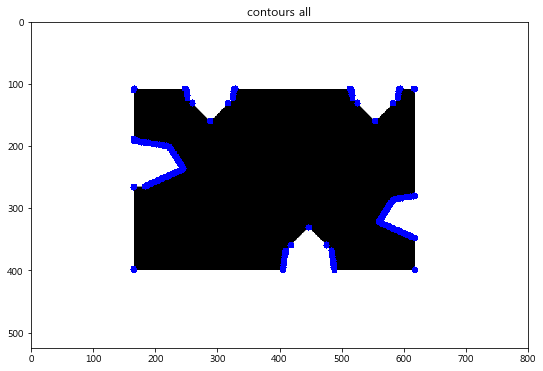

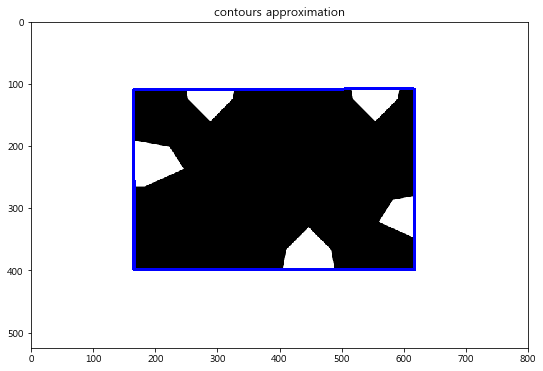

In [18]:
img = cv2.imread(imgfile)
img2 = img.copy()

# contour 그리기
cv2.drawContours(img2, contours[0], -1, (255, 0 , 0), 10)
cv2.drawContours(img, [approx], 0, (255, 0, 0), 3)

# 이미지 띄우기
cv2_plus.imshow(img2,title = 'contours all', fig_size = (12,6))
cv2_plus.imshow(img,title = 'contours approximation', fig_size = (12,6))

일반적으로 2%~5%정도 설정하면 된단다. epsilon 계수를<br>
위의 경우 많이 일그러져 있어서 그럼